### Andrzej Janik 406174
#### AiR gr 7
#### Logistic regression

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import sklearn.metrics

from matrix_mul_for_linear_reg import computeCost, simple_gradient
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

In [108]:
data.head(10)

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [109]:
X = data.values[:, :2].T
y = data.values[:, 2:].T
#print(X.shape) 2x100
#print(y.shape) 1x100

In [110]:
theta = np.zeros((X.shape[0] + 1, 1))
#print(theta.shape) 3x1

In [111]:
ones = np.ones([1, X.shape[1]]) #1x100
X = np.concatenate([ones, X])
#print(X.shape)  3x100

In [112]:
#normalization
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / np.std(X[i, :])


In [113]:
data_admitted = data.loc[data['Admitted'] == 1.0]
data_not_admitted = data.loc[data['Admitted'] == 0.0]

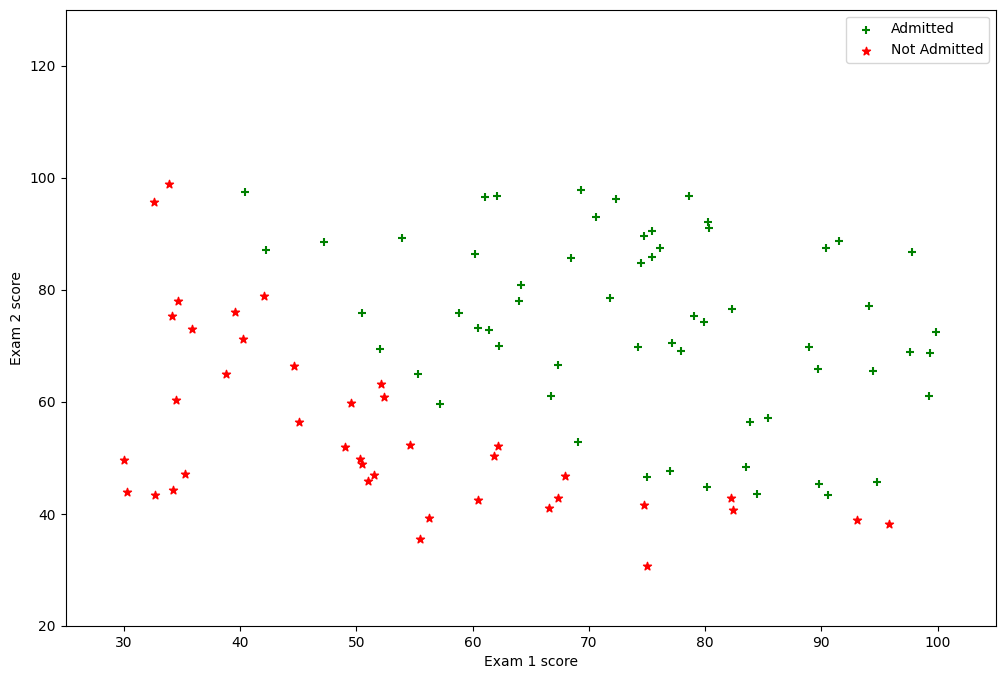

In [114]:
plt.figure(figsize=(12,8))
plt.scatter(x=data_admitted['Exam 1'], y=data_admitted['Exam 2'], label="Admitted", marker="+", c='g')
plt.scatter(x=data_not_admitted['Exam 1'], y=data_not_admitted['Exam 2'], label="Not Admitted", marker="*", c='r')
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.xlim(25, 105)
plt.ylim(20, 130)
plt.legend()
plt.show()

In [115]:
def sig(t):
    return 1 / (1 + np.exp(-t))

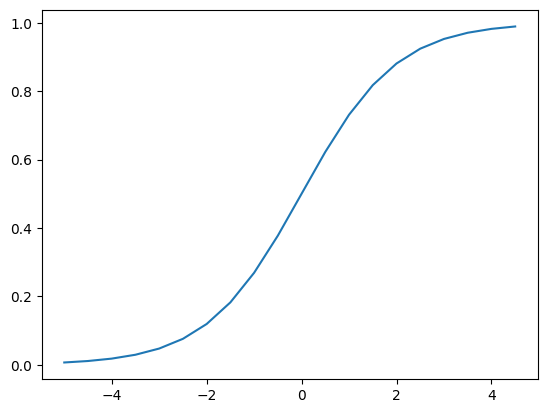

In [116]:
test_vector = np.arange(-5,5, 0.5)
plt.plot(test_vector, sig(test_vector))
plt.show()

In [117]:
def cost(theta, X, y):
    t = theta.T @ X
    h = sig(t) #1x100
    J = (np.sum((-y) * np.log(h) - ((1 - y) * np.log(1 - h)))) / X.shape[1]
    return J

In [118]:
J = cost(theta, X, y)
print(f"J = {J}")

J = 0.6931471805599453


In [119]:
def simple_gradient(X, y, theta, alpha, it):
    cost_ = []
    for i in range(it):
        t = theta.T @ X
        h = sig(t)
        grad = (X @ (h-y).T) / X.shape[1]
        theta = theta - alpha * grad
    cost_.append(cost(theta, X, y))
    return theta, cost_

In [120]:
theta, cost = simple_gradient(X, y, theta, alpha=1, it=150)
print(f"theta = {theta}\n cost = {cost[-1]}")

theta = [[1.41957362]
 [3.35941597]
 [3.11271333]]
 cost = 0.2064071430444978


In [121]:
predictions = (sig(theta.T @ X) > 0.5).astype(int)
predictions = (predictions == y).sum()
accuracy = predictions / X.shape[1]
print(f"Accuracy = {accuracy}")

Accuracy = 0.89


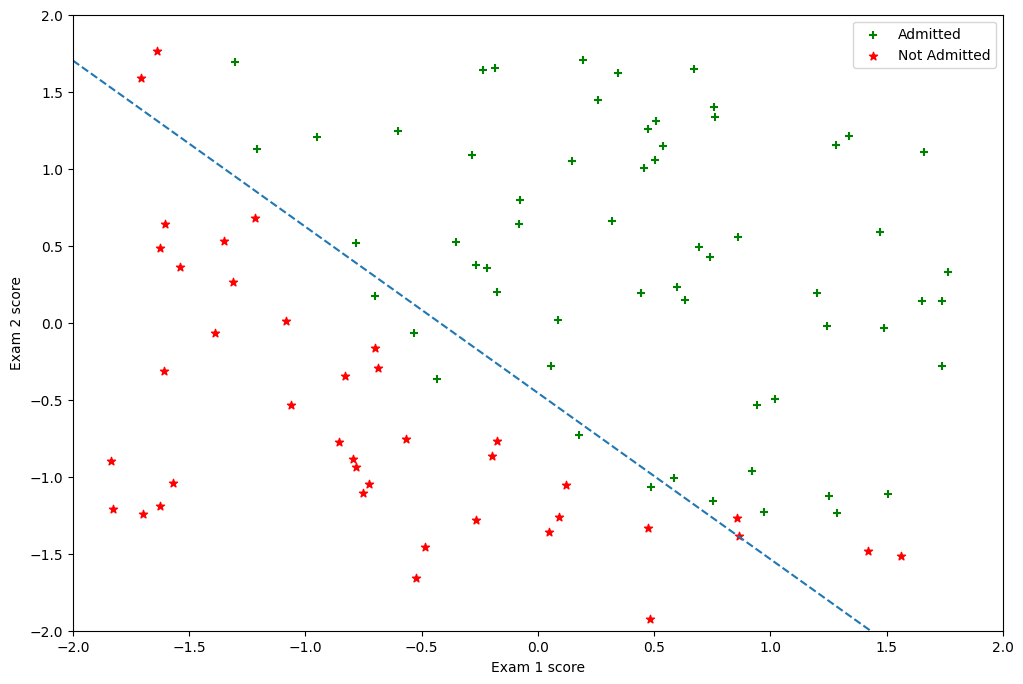

In [122]:
x1 = np.arange(-2.0, 2.0, 0.01)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.figure(figsize=(12,8))
plt.plot(x1, x2, '--')
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.scatter(X1_1, X2_1, label="Admitted", marker="+", c='g')
plt.scatter(X1_0, X2_0, label="Not Admitted", marker="*", c='r')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()
plt.show()

#### Logistic regression - Python
##### Multi-class logistic regresion

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix,ConfusionMatrixDisplay
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target

In [124]:
# X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,
#                                                     random_state=2)

logreg = LogisticRegression(penalty='l2', solver='newton-cg')
logreg.fit(X, Y)

LogisticRegression(solver='newton-cg')

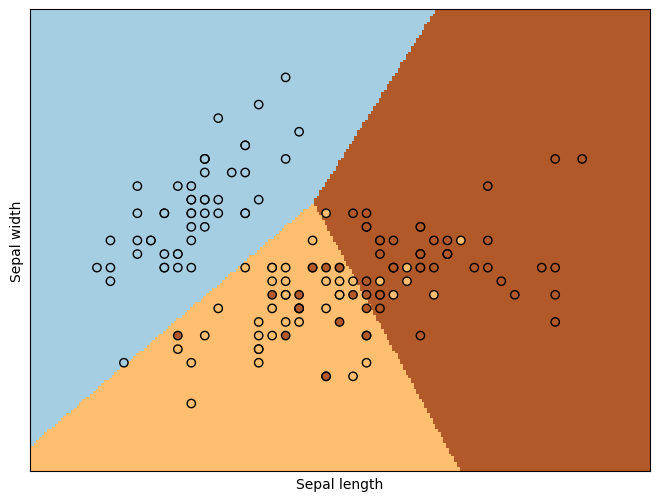

In [125]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [126]:
probability = logreg.predict_proba(X)

In [127]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [128]:
probability_setosa = np.sum(probability[:,0]) / Y.shape[0]
probability_versicolor = np.sum(probability[:,1]) / Y.shape[0]
probability_virginica = np.sum(probability[:,2]) / Y.shape[0]
print(f"Probability of being member class 'setosa' = {probability_setosa}")
print(f"Probability of being member class 'versicolor' = {probability_versicolor}")
print(f"Probability of being member class 'virginica' = {probability_virginica}")

Probability of being member class 'setosa' = 0.33333333335091236
Probability of being member class 'versicolor' = 0.3333333333432467
Probability of being member class 'virginica' = 0.33333333330584086


In [129]:
score = logreg.score(X,Y)
print(f"Algorithm accuracy score = {score}")

Algorithm accuracy score = 0.82


In [130]:
Y_predict = logreg.predict(X)
MSE = mean_squared_error(Y,Y_predict)
print(f"Mean squared error = {MSE}")

Mean squared error = 0.18


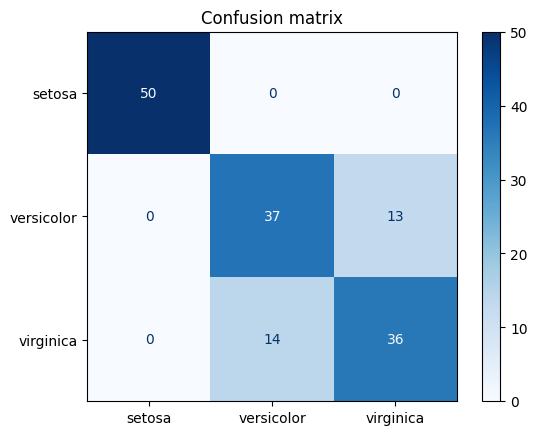

In [131]:
cm = confusion_matrix(Y, Y_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.xticks([0,1,2], list(iris.target_names))
plt.yticks([0,1,2], list(iris.target_names))
plt.xlabel("")
plt.ylabel("")
plt.show()